In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
text=''
for i in range(7):
    book='HP'+str(i+1)+'.txt' #file names are HP1, HP2,...,HP7
    with open(book,'r', encoding="utf8") as f:
        text += f.read()
    text += ' '

In [3]:
lines = nltk.sent_tokenize(text) #tokenizes the text using fullstops

In [4]:
lines[:5]

['the boy who lived mr. and mrs. dursley of number four privet drive were proud to say that they were perfectly normal thank you very much.',
 'they were the last people you’d expect to be involved in anything strange or mysterious because they just didn’t hold with such nonsense.',
 'mr. dursley was the director of a firm called grunnings which made drills.',
 'he was a big beefy man with hardly any neck although he did have a very large mustache.',
 'mrs. dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors.']

#### VADER - Valence Aware Dictionary and sEntiment Reasoner

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds=SentimentIntensityAnalyzer()

In [7]:
s=lines[1]
print(s)
print(vds.polarity_scores(s))

they were the last people you’d expect to be involved in anything strange or mysterious because they just didn’t hold with such nonsense.
{'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.5423}


In [8]:
vader_lines={}

k=0
for line in lines:
    sentiment=vds.polarity_scores(line)
    vader_lines[k]=sentiment  
    k+=1

In [16]:
x=[]
y=[]
for i in range(0,len(lines)):
    x.append(i)
    y.append(vader_lines[i]['compound'])

In [17]:
#Partitioning the lines according to the books:
book_text=''
book_split=[]
for i in range(7):
    book='HP'+str(i+1)+'.txt' #file names are HP1, HP2,...,HP7
    with open(book,'r', encoding="utf8") as f:
        book_text += f.read()
        book_lines = nltk.sent_tokenize(book_text)
        book_split.append(len(book_lines))

In [18]:
book_split

[4792, 10028, 17065, 28534, 40843, 49522, 60022]

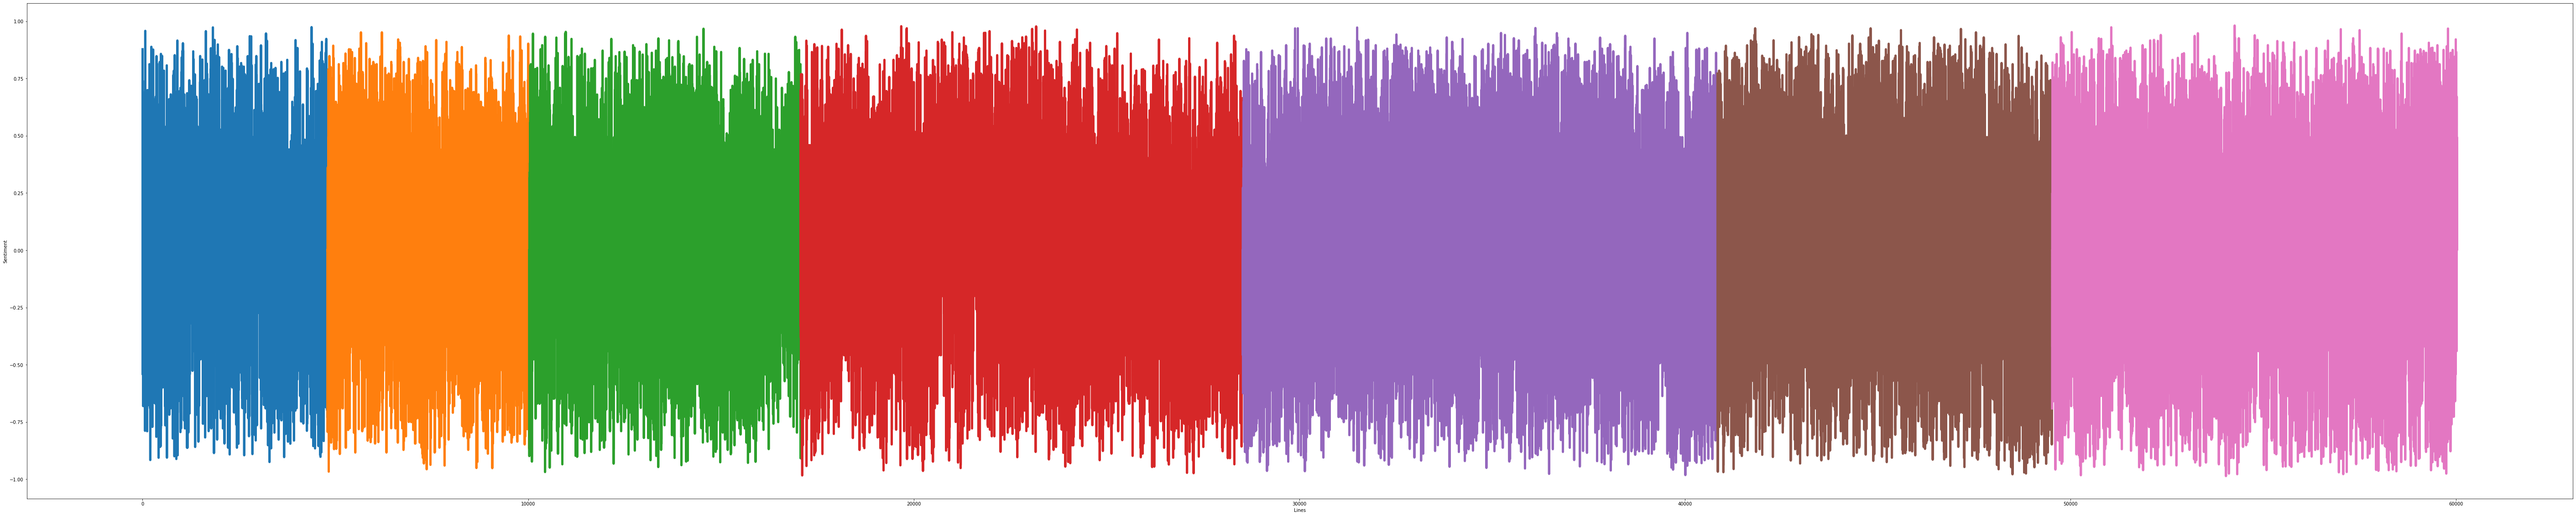

In [19]:
k=0
plt.figure(figsize = (100,20)) 

for i in book_split:
    x1=x[k:i]
    y1=y[k:i]
    
    plt.plot(x1,y1,linewidth=5)
    k=i

plt.xlabel('Lines')
plt.ylabel('Sentiment')
plt.show()  

### Each colour signifies a different book. However, plotting the sentiment of each line does not signify much. Instead, the lines are gathered in groups of 100, and the overall sentiment of each group is measured.

In [20]:
x_100=[]
y_100=[]
for i in range(0,len(lines),100):
    sum=0.00
    for j in range(i,i+100):
        try:
            sum+=vader_lines[j]['compound']
        except KeyError:
            pass
    avg=sum/100
    x_100.append(i)
    y_100.append(avg)

0 : 48
48 : 101
101 : 171
171 : 286
286 : 409
409 : 496
496 : 600


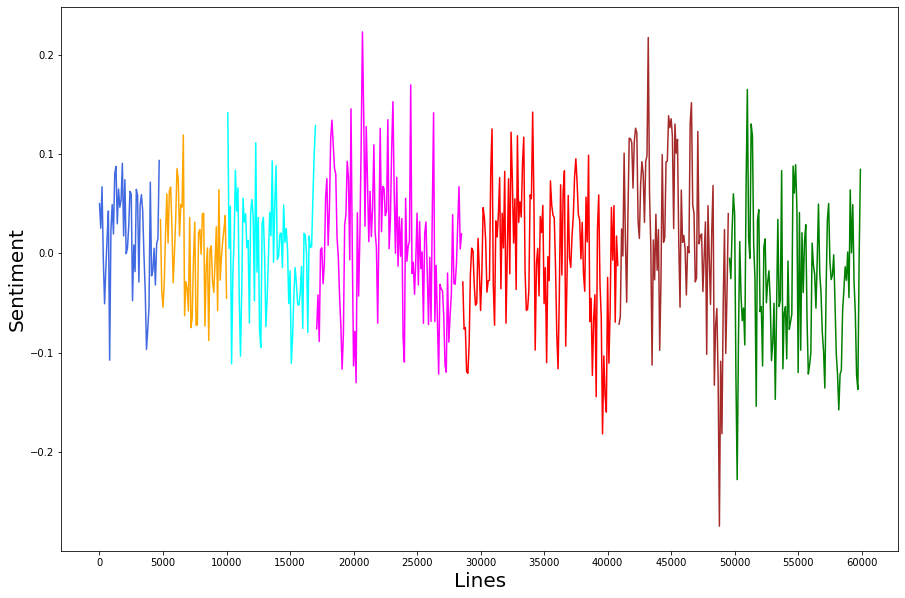

In [21]:
k=0 #holds the line value of book_split
j=0 #index to obtain k
plt.figure(figsize = (15,10))

color=['royalblue','orange','cyan','magenta','red','brown','green']

for i in x_100:
    
    if i==x_100[-1]: #manually checking for last element because it doesn't satisfy the if condition
        print(int(k/100),':',int(i/100)) #dividing the number of lines in each book by 100 to use it with the other groups 
        a=int(k/100)
        b=int(i/100)
        plt.plot(x_100[a:b],y_100[a:b],linewidth=1.5,color=color[j])

    if i<book_split[j]:
        continue
    else:
        print(int(k/100),':',int(i/100))
        a=int(k/100)
        b=int(i/100)
        plt.plot(x_100[a:b],y_100[a:b],linewidth=1.5,color=color[j])
        k=i
        j+=1
    

plt.xticks(np.arange(0, len(lines), 5000)) 
plt.xlabel('Lines',fontsize=20)
plt.ylabel('Sentiment',fontsize=20)
plt.show()  